In [69]:
# Import the machine learning libraries.
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

#One-to-One Sequence Problems

###One-to-One Sequence Problems with a Single Feature

Creating the Dataset

In [70]:
X = list()
Y = list()
data_length = 30
X = [x+1 for x in range(data_length)]
Y = [y * 15 for y in X]

print(X)
print(Y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450]


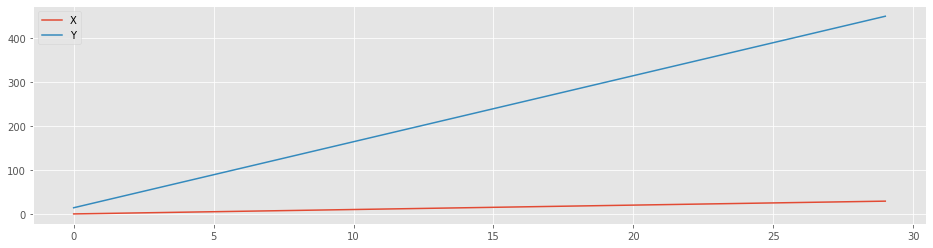

In [71]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 4))
plt.plot(X, label="X")
plt.plot(Y, label="Y")
plt.legend()

In [72]:
print(type(X), type(Y))

<class 'list'> <class 'list'>


In [73]:
Y = np.asarray(Y)

In [74]:
print(type(X), type(Y))

<class 'list'> <class 'numpy.ndarray'>


In [75]:
X = array(X).reshape(data_length, 1, 1)
print(X.shape)

(30, 1, 1)


Solution via Simple LSTM

In [76]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, batch_size=5)

Epoch 1/1000
5/5 [==============================] - 0s 42ms/step - loss: 46210.7031 - val_loss: 171781.9531
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 46121.2148 - val_loss: 171442.8594
Epoch 3/1000
5/5 [==============================] - 0s 5ms/step - loss: 46033.7148 - val_loss: 171106.2344
Epoch 4/1000
5/5 [==============================] - 0s 5ms/step - loss: 45948.3750 - val_loss: 170769.6406
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 45868.2539 - val_loss: 170411.5000
Epoch 6/1000
5/5 [==============================] - 0s 5ms/step - loss: 45772.1367 - val_loss: 170048.2500
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 45681.8633 - val_loss: 169653.8906
Epoch 8/1000
5/5 [==============================] - 0s 5ms/step - loss: 45583.9688 - val_loss: 169222.5469
Epoch 9/1000
5/5 [==============================] - 0s 5ms/step - loss: 45474.5000 - val_loss: 168750.7656
Epoch 10/1000
5/5 [=================

dict_keys(['loss', 'val_loss'])


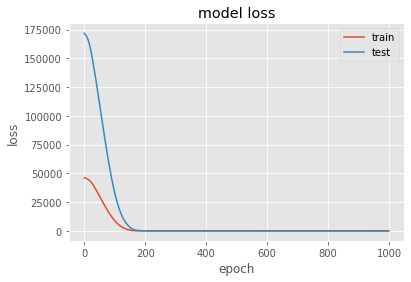

In [78]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [79]:
test_input = array([50])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[744.8765]]


Solution via Stacked LSTM

In [80]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 1, 50)             10400     
_________________________________________________________________
lstm_27 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
history = model.fit(X, Y, epochs=2000, validation_split=0.2, verbose=1, batch_size=5)

Epoch 1/2000
5/5 [==============================] - 0s 63ms/step - loss: 45927.3555 - val_loss: 170606.0625
Epoch 2/2000
5/5 [==============================] - 0s 6ms/step - loss: 45854.1914 - val_loss: 170279.0469
Epoch 3/2000
5/5 [==============================] - 0s 6ms/step - loss: 45776.7344 - val_loss: 169908.0781
Epoch 4/2000
5/5 [==============================] - 0s 6ms/step - loss: 45694.3438 - val_loss: 169447.7031
Epoch 5/2000
5/5 [==============================] - 0s 6ms/step - loss: 45593.0469 - val_loss: 168861.7500
Epoch 6/2000
5/5 [==============================] - 0s 6ms/step - loss: 45426.1523 - val_loss: 168121.1250
Epoch 7/2000
5/5 [==============================] - 0s 6ms/step - loss: 45249.3594 - val_loss: 167110.2656
Epoch 8/2000
5/5 [==============================] - 0s 7ms/step - loss: 44985.8477 - val_loss: 165729.2031
Epoch 9/2000
5/5 [==============================] - 0s 7ms/step - loss: 44709.7227 - val_loss: 163843.7656
Epoch 10/2000
5/5 [=================

dict_keys(['loss', 'val_loss'])


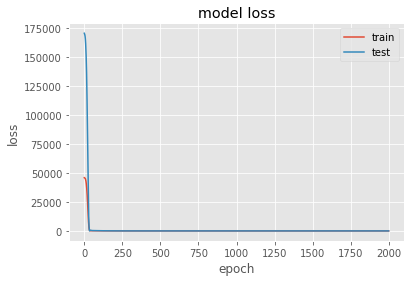

In [82]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [83]:
test_input = array([50])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[745.507]]


###One-to-One Sequence Problems with Multiple Features

Creating the Dataset

In [84]:
nums = 25

X1 = list()
X2 = list()
X = list()
Y = list()

X1 = [(x+1)*2 for x in range(25)]
X2 = [(x+1)*3 for x in range(25)]
Y = [x1*x2 for x1,x2 in zip(X1,X2)]
Y = np.asarray(Y)

print(X1)
print(X2)
print(Y)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75]
[   6   24   54   96  150  216  294  384  486  600  726  864 1014 1176
 1350 1536 1734 1944 2166 2400 2646 2904 3174 3456 3750]


In [85]:
X = np.column_stack((X1, X2))
print(X)

[[ 2  3]
 [ 4  6]
 [ 6  9]
 [ 8 12]
 [10 15]
 [12 18]
 [14 21]
 [16 24]
 [18 27]
 [20 30]
 [22 33]
 [24 36]
 [26 39]
 [28 42]
 [30 45]
 [32 48]
 [34 51]
 [36 54]
 [38 57]
 [40 60]
 [42 63]
 [44 66]
 [46 69]
 [48 72]
 [50 75]]


In [86]:
X = array(X).reshape(25, 1, 2)

Solution via Simple LSTM

In [87]:
model = Sequential()
model.add(LSTM(80, activation='relu', input_shape=(1, 2)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 80)                26560     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                810       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 27,381
Trainable params: 27,381
Non-trainable params: 0
_________________________________________________________________
None


In [88]:
model.fit(X, Y, epochs=2000, validation_split=0.2, batch_size=5)

Epoch 1/2000
4/4 [==============================] - 0s 52ms/step - loss: 1301941.1250 - val_loss: 10301458.0000
Epoch 2/2000
4/4 [==============================] - 0s 6ms/step - loss: 1299567.6250 - val_loss: 10290164.0000
Epoch 3/2000
4/4 [==============================] - 0s 7ms/step - loss: 1297462.8750 - val_loss: 10279679.0000
Epoch 4/2000
4/4 [==============================] - 0s 6ms/step - loss: 1295757.7500 - val_loss: 10268177.0000
Epoch 5/2000
4/4 [==============================] - 0s 6ms/step - loss: 1293708.2500 - val_loss: 10255779.0000
Epoch 6/2000
4/4 [==============================] - 0s 6ms/step - loss: 1291457.6250 - val_loss: 10241927.0000
Epoch 7/2000
4/4 [==============================] - 0s 6ms/step - loss: 1288546.5000 - val_loss: 10226809.0000
Epoch 8/2000
4/4 [==============================] - 0s 6ms/step - loss: 1286326.5000 - val_loss: 10212402.0000
Epoch 9/2000
4/4 [==============================] - 0s 6ms/step - loss: 1283767.7500 - val_loss: 10196102.0000


In [89]:
test_input = array([55,80])
test_input = test_input.reshape((1, 1, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[3958.3306]]


Solution via Stacked LSTM

In [90]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(1, 2)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 1, 200)            162400    
_________________________________________________________________
lstm_30 (LSTM)               (None, 1, 100)            120400    
_________________________________________________________________
lstm_31 (LSTM)               (None, 1, 50)             30200     
_________________________________________________________________
lstm_32 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_25 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_27 (Dense)             (None, 1)               

In [91]:
history = model.fit(X, Y, epochs=1000, validation_split=0.1, verbose=1, batch_size=3)

Epoch 1/1000
8/8 [==============================] - 1s 101ms/step - loss: 1884092.0000 - val_loss: 12026667.0000
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 1884002.8750 - val_loss: 12026192.0000
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 1883758.3750 - val_loss: 12023211.0000
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 1881492.5000 - val_loss: 11992809.0000
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 1871351.8750 - val_loss: 11890636.0000
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 1824137.6250 - val_loss: 11573556.0000
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 1735818.8750 - val_loss: 10855354.0000
Epoch 8/1000
8/8 [==============================] - 0s 7ms/step - loss: 1524738.5000 - val_loss: 9072771.0000
Epoch 9/1000
8/8 [==============================] - 0s 8ms/step - loss: 1059790.1250 - val_loss: 6186329.5000
E

dict_keys(['loss', 'val_loss'])


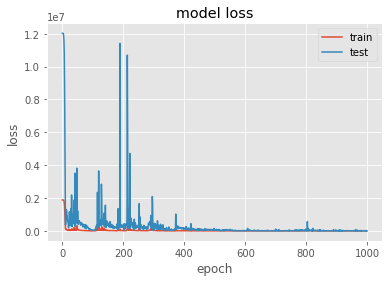

In [92]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [93]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[4253.1826]]


#Many-to-One Sequence Problems

###Many-to-One Sequence Problems with a Single Feature

Creating the Dataset

In [94]:
X = np.array([x+1 for x in range(45)])
print(X)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [95]:
X = X.reshape(15,3,1)
print(X)

[[[ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]]

 [[ 7]
  [ 8]
  [ 9]]

 [[10]
  [11]
  [12]]

 [[13]
  [14]
  [15]]

 [[16]
  [17]
  [18]]

 [[19]
  [20]
  [21]]

 [[22]
  [23]
  [24]]

 [[25]
  [26]
  [27]]

 [[28]
  [29]
  [30]]

 [[31]
  [32]
  [33]]

 [[34]
  [35]
  [36]]

 [[37]
  [38]
  [39]]

 [[40]
  [41]
  [42]]

 [[43]
  [44]
  [45]]]


In [96]:
Y = list()
for x in X:
    Y.append(x.sum())

Y = np.array(Y)
print(Y)

[  6  15  24  33  42  51  60  69  78  87  96 105 114 123 132]


Solution via Simple LSTM

In [97]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [98]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 190ms/step - loss: 4462.1787 - val_loss: 16826.2598
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 4427.5581 - val_loss: 16699.4082
Epoch 3/1000
1/1 [==============================] - 0s 18ms/step - loss: 4393.9409 - val_loss: 16576.3984
Epoch 4/1000
1/1 [==============================] - 0s 22ms/step - loss: 4361.2534 - val_loss: 16457.0293
Epoch 5/1000
1/1 [==============================] - 0s 17ms/step - loss: 4329.4146 - val_loss: 16341.0811
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 4298.3315 - val_loss: 16228.2920
Epoch 7/1000
1/1 [==============================] - 0s 17ms/step - loss: 4267.9136 - val_loss: 16118.3955
Epoch 8/1000
1/1 [==============================] - 0s 18ms/step - loss: 4238.0552 - val_loss: 16010.9561
Epoch 9/1000
1/1 [==============================] - 0s 18ms/step - loss: 4208.6914 - val_loss: 15905.8125
Epoch 10/1000
1/1 [==========================

dict_keys(['loss', 'val_loss'])


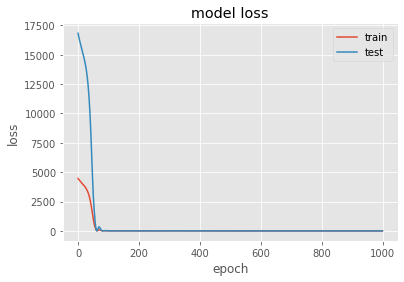

In [99]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [100]:
test_input = array([50,51,52])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[152.65167]]


Solution via Stacked LSTM

In [101]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(3, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [102]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 1s 507ms/step - loss: 4046.2493 - val_loss: 15177.0244
Epoch 2/1000
1/1 [==============================] - 0s 18ms/step - loss: 4044.3018 - val_loss: 15171.5938
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 4042.6130 - val_loss: 15166.2861
Epoch 4/1000
1/1 [==============================] - 0s 18ms/step - loss: 4040.8691 - val_loss: 15158.9639
Epoch 5/1000
1/1 [==============================] - 0s 18ms/step - loss: 4038.9424 - val_loss: 15148.3701
Epoch 6/1000
1/1 [==============================] - 0s 19ms/step - loss: 4036.4570 - val_loss: 15131.3125
Epoch 7/1000
1/1 [==============================] - 0s 18ms/step - loss: 4033.0637 - val_loss: 15103.3252
Epoch 8/1000
1/1 [==============================] - 0s 18ms/step - loss: 4028.2380 - val_loss: 15055.3721
Epoch 9/1000
1/1 [==============================] - 0s 18ms/step - loss: 4020.9246 - val_loss: 14973.3799
Epoch 10/1000
1/1 [==========================

dict_keys(['loss', 'val_loss'])


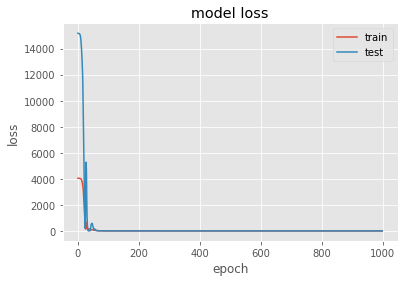

In [103]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [104]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[153.14206]]


Solution via Bidirectional LSTM

In [105]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [106]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 294ms/step - loss: 4028.7073 - val_loss: 15125.0625
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 4004.1604 - val_loss: 15043.6396
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 3979.8262 - val_loss: 14962.4619
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 3955.6741 - val_loss: 14881.4131
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 3931.6838 - val_loss: 14800.6641
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 3907.6995 - val_loss: 14719.5439
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 3883.5769 - val_loss: 14637.2998
Epoch 8/1000
1/1 [==============================] - 0s 21ms/step - loss: 3859.2092 - val_loss: 14553.8125
Epoch 9/1000
1/1 [==============================] - 0s 19ms/step - loss: 3834.4993 - val_loss: 14468.4727
Epoch 10/1000
1/1 [==========================

dict_keys(['loss', 'val_loss'])


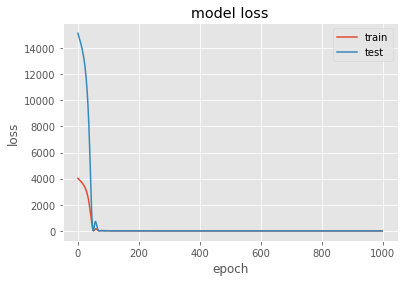

In [107]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [108]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[152.34084]]


###Many-to-one Sequence Problems with Multiple Features

Creating the Dataset

In [109]:
X1 = np.array([x+3 for x in range(0, 135, 3)])
print(X1)

X2 = np.array([x+5 for x in range(0, 225, 5)])
print(X2)

[  3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54
  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105 108
 111 114 117 120 123 126 129 132 135]
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180
 185 190 195 200 205 210 215 220 225]


In [110]:
X = np.column_stack((X1, X2))
print(X)

[[  3   5]
 [  6  10]
 [  9  15]
 [ 12  20]
 [ 15  25]
 [ 18  30]
 [ 21  35]
 [ 24  40]
 [ 27  45]
 [ 30  50]
 [ 33  55]
 [ 36  60]
 [ 39  65]
 [ 42  70]
 [ 45  75]
 [ 48  80]
 [ 51  85]
 [ 54  90]
 [ 57  95]
 [ 60 100]
 [ 63 105]
 [ 66 110]
 [ 69 115]
 [ 72 120]
 [ 75 125]
 [ 78 130]
 [ 81 135]
 [ 84 140]
 [ 87 145]
 [ 90 150]
 [ 93 155]
 [ 96 160]
 [ 99 165]
 [102 170]
 [105 175]
 [108 180]
 [111 185]
 [114 190]
 [117 195]
 [120 200]
 [123 205]
 [126 210]
 [129 215]
 [132 220]
 [135 225]]


In [111]:
X = array(X).reshape(15, 3, 2)
print(X)

[[[  3   5]
  [  6  10]
  [  9  15]]

 [[ 12  20]
  [ 15  25]
  [ 18  30]]

 [[ 21  35]
  [ 24  40]
  [ 27  45]]

 [[ 30  50]
  [ 33  55]
  [ 36  60]]

 [[ 39  65]
  [ 42  70]
  [ 45  75]]

 [[ 48  80]
  [ 51  85]
  [ 54  90]]

 [[ 57  95]
  [ 60 100]
  [ 63 105]]

 [[ 66 110]
  [ 69 115]
  [ 72 120]]

 [[ 75 125]
  [ 78 130]
  [ 81 135]]

 [[ 84 140]
  [ 87 145]
  [ 90 150]]

 [[ 93 155]
  [ 96 160]
  [ 99 165]]

 [[102 170]
  [105 175]
  [108 180]]

 [[111 185]
  [114 190]
  [117 195]]

 [[120 200]
  [123 205]
  [126 210]]

 [[129 215]
  [132 220]
  [135 225]]]


Solution via Simple LSTM

In [112]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [113]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 215ms/step - loss: 2766.9758 - val_loss: 10043.9482
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 2663.9036 - val_loss: 9670.0430
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 2560.7327 - val_loss: 9297.3320
Epoch 4/1000
1/1 [==============================] - 0s 17ms/step - loss: 2457.5376 - val_loss: 8926.6670
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 2354.7029 - val_loss: 8555.9336
Epoch 6/1000
1/1 [==============================] - 0s 16ms/step - loss: 2252.1360 - val_loss: 8182.9204
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 2149.4414 - val_loss: 7796.1733
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 2044.7296 - val_loss: 7401.9819
Epoch 9/1000
1/1 [==============================] - 0s 18ms/step - loss: 1939.3802 - val_loss: 6999.5747
Epoch 10/1000
1/1 [==============================] - 

dict_keys(['loss', 'val_loss'])


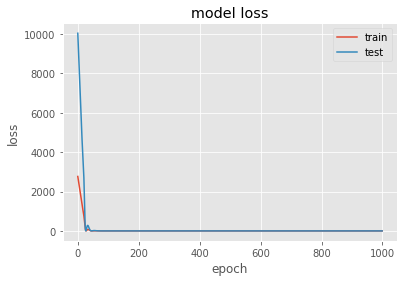

In [114]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [115]:
test_input = array([[8, 51],
                    [11,56],
                    [14,61]])

test_input = test_input.reshape((1, 3, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[27.86265]]


Solution via Stacked LSTM

In [116]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(3, 2)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [117]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 1s 555ms/step - loss: 4047.4519 - val_loss: 15182.7539
Epoch 2/1000
1/1 [==============================] - 0s 19ms/step - loss: 4045.4875 - val_loss: 15182.5078
Epoch 3/1000
1/1 [==============================] - 0s 20ms/step - loss: 4045.2791 - val_loss: 15182.2617
Epoch 4/1000
1/1 [==============================] - 0s 20ms/step - loss: 4045.1672 - val_loss: 15182.0166
Epoch 5/1000
1/1 [==============================] - 0s 20ms/step - loss: 4045.0554 - val_loss: 15181.7705
Epoch 6/1000
1/1 [==============================] - 0s 20ms/step - loss: 4044.9441 - val_loss: 15181.5234
Epoch 7/1000
1/1 [==============================] - 0s 20ms/step - loss: 4044.8328 - val_loss: 15181.2783
Epoch 8/1000
1/1 [==============================] - 0s 23ms/step - loss: 4044.7214 - val_loss: 15181.0312
Epoch 9/1000
1/1 [==============================] - 0s 20ms/step - loss: 4044.6355 - val_loss: 15180.7852
Epoch 10/1000
1/1 [==========================

dict_keys(['loss', 'val_loss'])


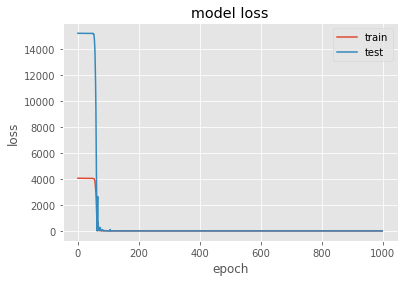

In [118]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [119]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[24.488949]]


Solution via Bidirectional LSTM

In [120]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(3, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [121]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 306ms/step - loss: 3502.7432 - val_loss: 12473.2969
Epoch 2/1000
1/1 [==============================] - 0s 19ms/step - loss: 3289.8027 - val_loss: 11470.2344
Epoch 3/1000
1/1 [==============================] - 0s 19ms/step - loss: 3046.9629 - val_loss: 10272.5391
Epoch 4/1000
1/1 [==============================] - 0s 17ms/step - loss: 2778.6748 - val_loss: 9059.0898
Epoch 5/1000
1/1 [==============================] - 0s 17ms/step - loss: 2505.7246 - val_loss: 8021.0063
Epoch 6/1000
1/1 [==============================] - 0s 18ms/step - loss: 2246.3391 - val_loss: 7164.4238
Epoch 7/1000
1/1 [==============================] - 0s 17ms/step - loss: 2009.8197 - val_loss: 6387.2578
Epoch 8/1000
1/1 [==============================] - 0s 18ms/step - loss: 1792.0825 - val_loss: 5640.2422
Epoch 9/1000
1/1 [==============================] - 0s 17ms/step - loss: 1587.6400 - val_loss: 4953.5903
Epoch 10/1000
1/1 [==============================] 

dict_keys(['loss', 'val_loss'])


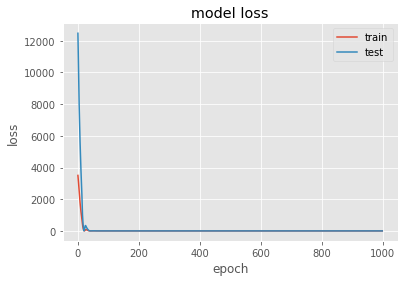

In [122]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [123]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[23.284101]]


In [124]:
Y = list()
for x in X:
    new_item = list()
    new_item.append(x[2][0]+3)
    new_item.append(x[2][1]+5)
    Y.append(new_item)

Y = np.array(Y)
print(Y)

[[ 12  20]
 [ 21  35]
 [ 30  50]
 [ 39  65]
 [ 48  80]
 [ 57  95]
 [ 66 110]
 [ 75 125]
 [ 84 140]
 [ 93 155]
 [102 170]
 [111 185]
 [120 200]
 [129 215]
 [138 230]]


In [125]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [126]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 205ms/step - loss: 9705.9590 - val_loss: 33628.1602
Epoch 2/1000
1/1 [==============================] - 0s 18ms/step - loss: 9587.6025 - val_loss: 33087.4062
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 9498.6260 - val_loss: 32712.4434
Epoch 4/1000
1/1 [==============================] - 0s 17ms/step - loss: 9425.6748 - val_loss: 32388.4062
Epoch 5/1000
1/1 [==============================] - 0s 17ms/step - loss: 9355.9639 - val_loss: 32074.9121
Epoch 6/1000
1/1 [==============================] - 0s 18ms/step - loss: 9285.5225 - val_loss: 31778.7715
Epoch 7/1000
1/1 [==============================] - 0s 19ms/step - loss: 9215.6650 - val_loss: 31513.7285
Epoch 8/1000
1/1 [==============================] - 0s 17ms/step - loss: 9148.6104 - val_loss: 31278.1230
Epoch 9/1000
1/1 [==============================] - 0s 17ms/step - loss: 9084.5420 - val_loss: 31067.9062
Epoch 10/1000
1/1 [==========================

dict_keys(['loss', 'val_loss'])


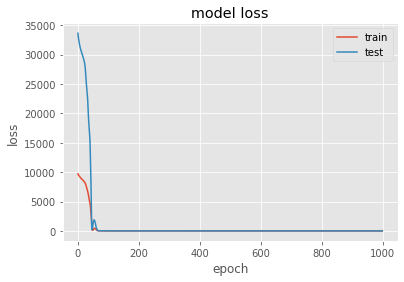

In [127]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [128]:
test_input = array([[20,34],
                    [23,39],
                    [26,44]])

test_input = test_input.reshape((1, 3, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[29.053823 48.78023 ]]


In [129]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(3, 2)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [130]:
history = model.fit(X, Y, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
1/1 [==============================] - 0s 432ms/step - loss: 9006.9082 - val_loss: 31535.5645
Epoch 2/500
1/1 [==============================] - 0s 19ms/step - loss: 8937.8154 - val_loss: 31395.9141
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 8914.6768 - val_loss: 31350.4746
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 8902.7217 - val_loss: 31253.9746
Epoch 5/500
1/1 [==============================] - 0s 19ms/step - loss: 8881.4258 - val_loss: 31171.1621
Epoch 6/500
1/1 [==============================] - 0s 18ms/step - loss: 8862.2041 - val_loss: 31123.7422
Epoch 7/500
1/1 [==============================] - 0s 20ms/step - loss: 8843.2812 - val_loss: 31003.6777
Epoch 8/500
1/1 [==============================] - 0s 19ms/step - loss: 8813.0850 - val_loss: 30825.6582
Epoch 9/500
1/1 [==============================] - 0s 19ms/step - loss: 8767.0078 - val_loss: 30578.0312
Epoch 10/500
1/1 [==============================] - 0s

dict_keys(['loss', 'val_loss'])


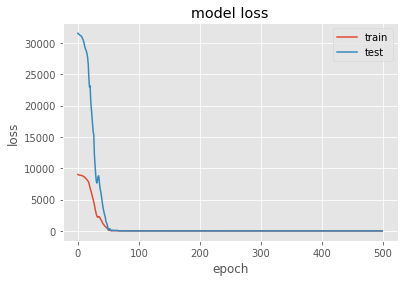

In [131]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [132]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[29.231869 48.708   ]]


In [133]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(3, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [134]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 306ms/step - loss: 8492.0020 - val_loss: 27843.8652
Epoch 2/1000
1/1 [==============================] - 0s 20ms/step - loss: 8118.4751 - val_loss: 26693.0391
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 7765.0894 - val_loss: 25466.9043
Epoch 4/1000
1/1 [==============================] - 0s 17ms/step - loss: 7420.9355 - val_loss: 24181.6152
Epoch 5/1000
1/1 [==============================] - 0s 20ms/step - loss: 7084.4565 - val_loss: 22935.3379
Epoch 6/1000
1/1 [==============================] - 0s 18ms/step - loss: 6761.0962 - val_loss: 21828.1191
Epoch 7/1000
1/1 [==============================] - 0s 18ms/step - loss: 6457.0840 - val_loss: 20851.6973
Epoch 8/1000
1/1 [==============================] - 0s 24ms/step - loss: 6173.0532 - val_loss: 19907.7559
Epoch 9/1000
1/1 [==============================] - 0s 20ms/step - loss: 5902.5825 - val_loss: 18861.8398
Epoch 10/1000
1/1 [==========================

dict_keys(['loss', 'val_loss'])


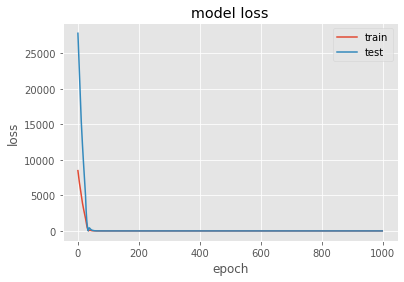

In [135]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [136]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[29.388754 48.774464]]
